In [214]:
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
sns.set_style('whitegrid')

In [215]:
try:
    Titanic = pd.read_csv('TITANIC.csv')
except FileNotFoundError:
    print("The Titanic dataset file was not found.")
except pd.errors.ParserError:
    print("There was an error parsing the Titanic CSV file.")

In [216]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [217]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [218]:
Titanic.shape

(891, 15)

In [220]:
# Fill missing values in the 'age' column with the median age
if 'age' in Titanic.columns:
    Titanic['age'] = Titanic['age'].fillna(Titanic['age'].median())

In [221]:
Titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [222]:
# Fill missing values in the 'embarked' column with the most common value 'S'
Titanic['embarked'] = Titanic['embarked'].fillna('S') 

In [223]:
Titanic['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [224]:
# Convert 'pclass' column to categorical data type for better analysis 
Titanic['pclass'] = Titanic['pclass'].astype('category')

WHAT IS THE SURVIVAL RATE OF PASSENGERS?

In [225]:
# Calculate the overall survival rate of all passengers
Survival_rate = Titanic['survived'].mean()  

# Print the result formatted as a percentage with 2 decimal places
print(f"Survival rate of passengers: {Survival_rate:.2%}")

Survival rate of passengers: 38.38%


WHAT IS THE GENDER DISTRIBUTION OF PASSENGERS?

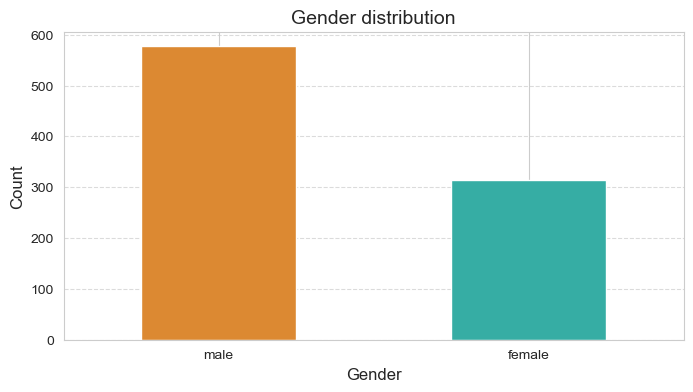

In [227]:
# Count the number of passengers by gender (male/female)
Gender_count = Titanic['sex'].value_counts()

# Plot a bar chart of gender distribution with custom colors
colors = [sns.color_palette('husl', 10)[1], sns.color_palette('husl', 10)[5]]
Gender_count.plot(kind = 'bar', figsize = (8,4), color = colors)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender distribution', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

HOW DOES SURVIVAL RATE DIFFER BY CLASS?

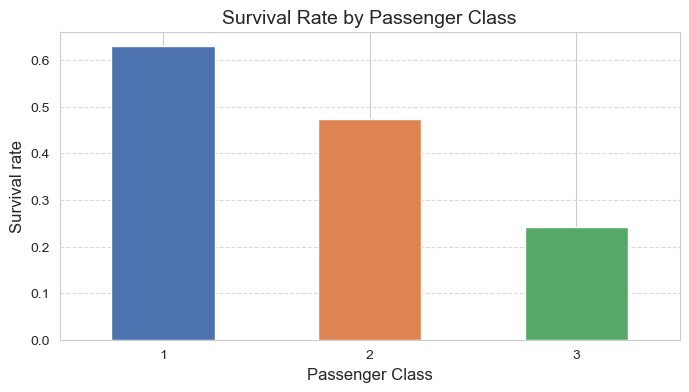

In [228]:
# Group the data by passenger class and calculate the mean survival rate per class
Survival_rate = Titanic.groupby('pclass', observed=False)['survived'].mean()

# Define a color palette with 3 distinct colors
colors = sns.color_palette('deep', 3)

# Plot the survival rate by class as a bar chart
Survival_rate.plot(kind = 'bar', figsize = (8,4), color = colors)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival rate', fontsize=12)
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

WHAT IS THE DISTRIBUTION OF PASSENGER AGES?

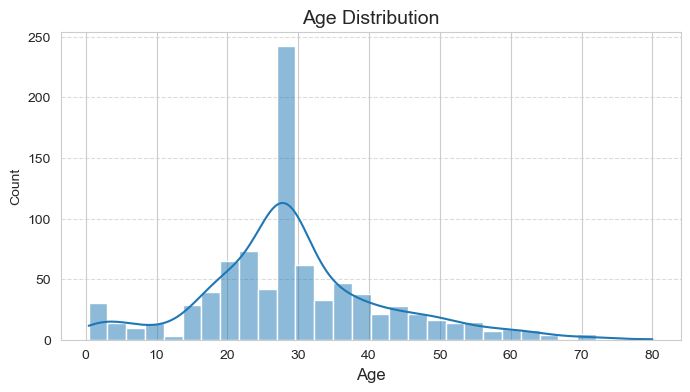

In [229]:
# Plot a histogram of passenger ages with a KDE, excluding missing values
plt.figure(figsize=(8,4))
sns.histplot(Titanic['age'].dropna(), kde=True)
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7);

HOW MANY PASSENGERS EMBARKED FROM EACH LOCATION?

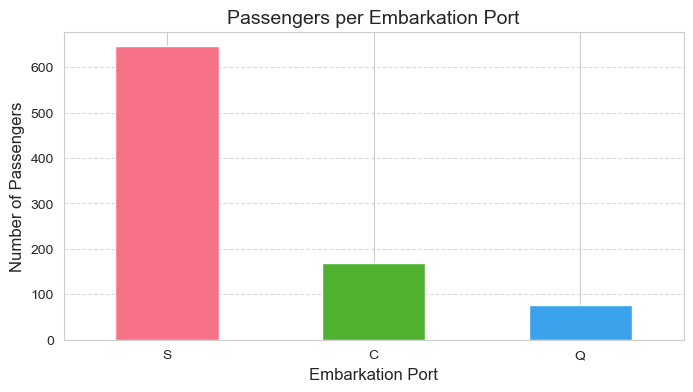

In [230]:
# Count the number of passengers from each embarkation port
Embarked_Passengers = Titanic['embarked'].value_counts()

# Generate a color palette with 3 distinct colors
colors = sns.color_palette('husl', 3)

# Plot the counts as a bar chart with the custom color palette
Embarked_Passengers.plot(kind='bar', figsize = (8,4), color = colors)
plt.xlabel('Embarkation Port', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title('Passengers per Embarkation Port', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

WHAT IS THE AVERAGE FARE PAID PER CLASS?

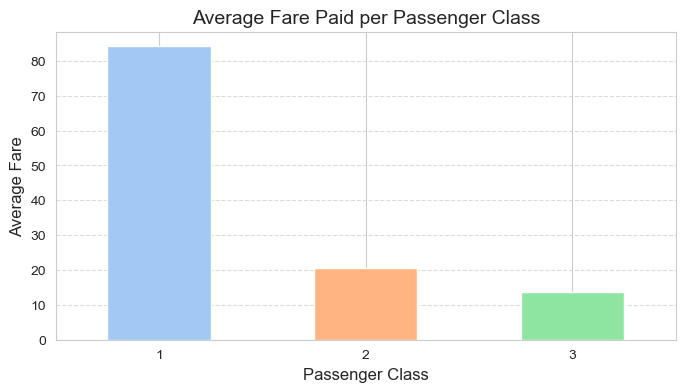

In [231]:
# Group the data by passenger class and calculate the average fare for each class
Average_fare = Titanic.groupby('pclass', observed=True)['fare'].mean()

colors = sns.color_palette('pastel', n_colors=len(Average_fare))
# Plot the average fare by class as a bar chart
Average_fare.plot(kind = 'bar', figsize = (8, 4), color = colors)
plt.title('Average Fare Paid per Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

HOW DOES GENDER AFFECT SURVIVAL RATES?

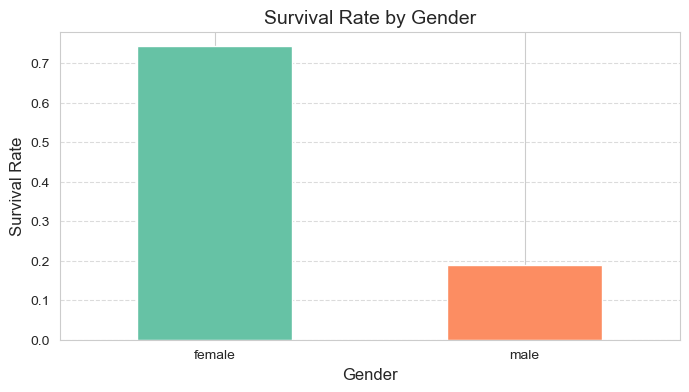

In [232]:
# Group the data by gender and calculate the average survival rate for each gender
survival_by_gender = Titanic.groupby('sex')['survived'].mean()

colors = sns.color_palette('Set2', n_colors=len(survival_by_gender))
# Plot the survival rate by gender as a bar chart
survival_by_gender.plot(kind='bar', figsize=(8, 4), color= colors)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.title('Survival Rate by Gender', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

WHAT IS THE CORRELATION BETWEEN FARE AND SURVIVAL?

              fare  survived
fare      1.000000  0.257307
survived  0.257307  1.000000


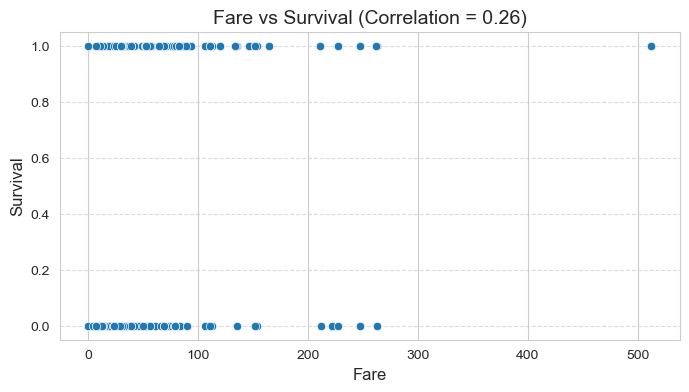

In [233]:
# Calculate the correlation matrix between 'fare' and 'survived'
correlation = Titanic[['fare', 'survived']].corr()

# Print the correlation matrix
print(correlation)

# Get the correlation value between fare and survival
corr_value = correlation.loc['fare', 'survived']

# Use seaborn to create a scatter plot of fare vs survival
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Titanic, x='fare', y='survived')
plt.title(f"Fare vs Survival (Correlation = {corr_value:.2f})", fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Survival', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7);

HOW DOES THE NUMBER OF SIBLINGS/SPOUSES ABROAD AFFECT SURVIVAL?

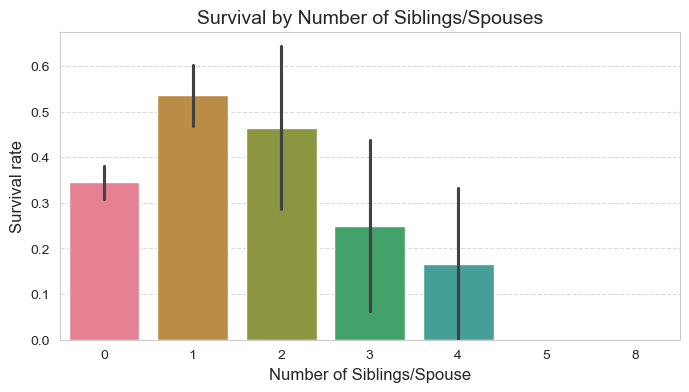

In [234]:
# Use seaborn's barplot to show average survival rate grouped by 'sibsp'
# 'palette' assigns distinct colors to each category using the 'husl' theme
plt.figure(figsize = (8,4))
sns.barplot(data = Titanic, x='sibsp', y='survived', hue='sibsp', palette='husl', legend=False) 
plt.xlabel('Number of Siblings/Spouse', fontsize=12)
plt.ylabel('Survival rate', fontsize=12)
plt.title('Survival by Number of Siblings/Spouses', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7);

WHAT IS THE AGE DISTRIBUTION BY CLASS?

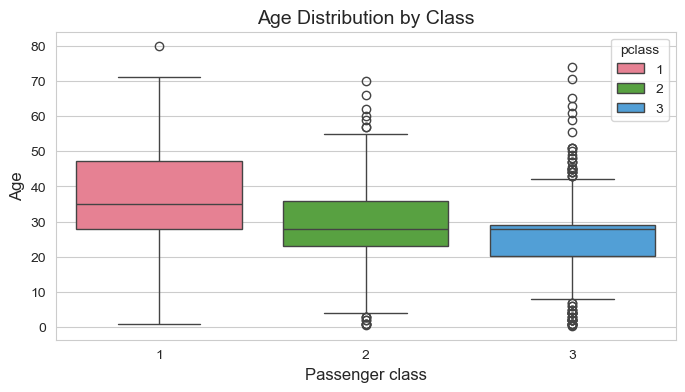

In [240]:
# Create a boxplot to show age distribution across passenger classes
plt.figure(figsize = (8,4))
sns.boxplot(data = Titanic, x='pclass', y='age', hue = 'pclass', palette = 'husl', hue_order=[1, 2, 3])
plt.xlabel('Passenger class', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age Distribution by Class', fontsize=14);

WHAT IS THE SURVIVAL RATE BY EMBARKATION POINT?

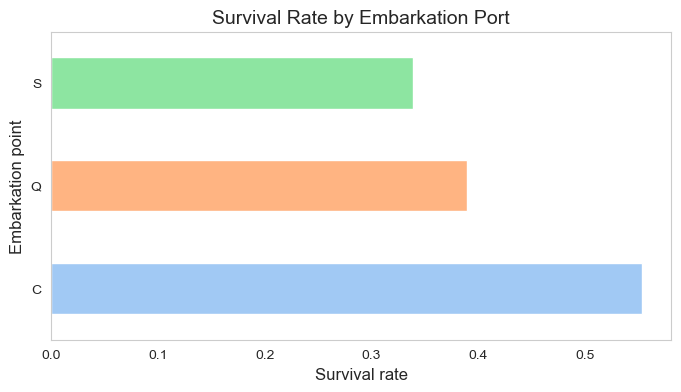

In [239]:
# Group the dataset by embarkation point and calculate mean survival rate for each group
survival_by_embark = Titanic.groupby('embarked')['survived'].mean()

# Generate a pastel color palette with 3 colors
colors = sns.color_palette('pastel', n_colors=3)

# Plot a horizontal bar chart of survival rate by embarkation port
survival_by_embark.plot(kind='barh', figsize=(8,4), color=colors)
plt.xlabel('Survival rate', fontsize=12)
plt.ylabel('Embarkation point', fontsize=12)
plt.title('Survival Rate by Embarkation Port', fontsize=14)
plt.xticks(rotation=0)
plt.grid(False);

WHAT IS THE IMPACT OF HAVING PARENTS/CHILDREN ABROAD ON SURVIVAL?

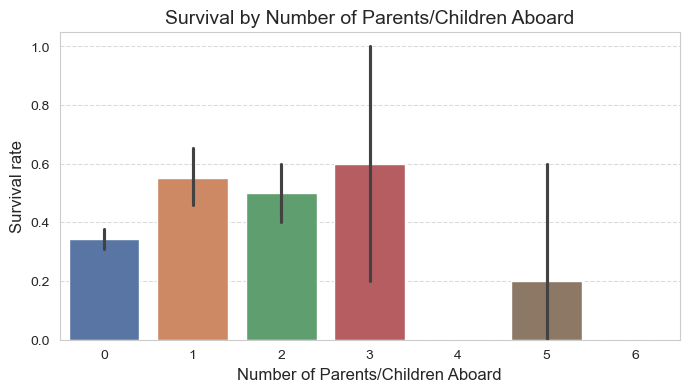

In [236]:
# Create a bar plot of survival rate by number of parents/children aboard
plt.figure(figsize=(8,4))
sns.barplot(data = Titanic, x='parch', y='survived', hue = 'parch', palette = 'deep', legend=False)
plt.xlabel('Number of Parents/Children Aboard', fontsize=12)
plt.ylabel('Survival rate', fontsize=12)
plt.title('Survival by Number of Parents/Children Aboard', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

In [237]:
overall_survival = Titanic['survived'].mean() * 100
female_survival = Titanic[Titanic['sex'] == 'female']['survived'].mean() * 100
male_survival = Titanic[Titanic['sex'] == 'male']['survived'].mean() * 100
first_class_survival = Titanic[Titanic['pclass'] == 1]['survived'].mean() * 100
embark_survival = Titanic.groupby('embarked')['survived'].mean()
highest_embark = embark_survival.idxmax()
highest_embark_rate = embark_survival.max() * 100

In [238]:
print("Summary of Findings:")
print(f"- Overall survival rate was about {overall_survival:.2f}%.")
print(f"- Females had a higher survival rate ({female_survival:.2f}%) than males ({male_survival:.2f}%).")
print(f"- First-class passengers had the highest survival rate at {first_class_survival:.2f}%.")
print(f"- Passengers who embarked at port '{highest_embark}' had the highest survival rate ({highest_embark_rate:.2f}%).")

Summary of Findings:
- Overall survival rate was about 38.38%.
- Females had a higher survival rate (74.20%) than males (18.89%).
- First-class passengers had the highest survival rate at 62.96%.
- Passengers who embarked at port 'C' had the highest survival rate (55.36%).
